### Set up and load data

In [58]:
data_dir = "/Users/lukeh/Downloads/"
sdg_names = pd.read_csv(data_dir + "sdg_name_definition.csv")

text_file_name = "osdg-community-data-v2024-04-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
text_df.drop(text_df.columns.values[0],axis = 1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2").reset_index(drop=True)

### Extracting Top 50 Stop Words.ps:
1. **Load Dataset**:
   - Load a CSV file and filter rows based on specific conditions (`agreement > 0.5` and label differences).

2. **Prepare Corpus**:
   - Extract the `text` column as a list of strings for analysis.

3. **Analyze Word Frequencies**:
   - Use `CountVectorizer` to vectorize the text and compute word frequencies.
   - Sort words by frequency and return the top 50 after stop word removal.

4. **Output**:
   - The script prints the top 50 words, excluding stop words.


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_stop_words(corpus, stop_words='english', top_n=50):
    """
    Returns the top N stop words from the corpus based on frequency.
    Args:
        corpus (list of str): The text corpus to analyze.
        stop_words (str or list): List of stop words to remove or 'english' for default.
        top_n (int): Number of top stop words to return.

    Returns:
        top_stop_words (list): List of the top N stop words by frequency.
    """
    # Initialize CountVectorizer with stop words
    count_vectorizer = CountVectorizer(stop_words=stop_words)
    count_vector = count_vectorizer.fit_transform(corpus)
    
    # Extract vocabulary and frequencies
    vocab = count_vectorizer.get_feature_names_out()
    word_freq = count_vector.sum(axis=0).A1  # Get frequency for each word
    
    # Combine and sort terms by frequency
    term_freq = pd.DataFrame({"term": vocab, "freq": word_freq})
    term_freq = term_freq.sort_values(by="freq", ascending=False).reset_index(drop=True)
    
    # Top N stop words
    top_stop_words = term_freq.head(top_n)['term'].tolist()
    return top_stop_words

# Load your dataset
data_dir = "/Users/lukeh/Downloads/"
text_file_name = "osdg-community-data-v2024-04-01.csv"
text_df = pd.read_csv(data_dir + text_file_name, sep="\t", quotechar='"')

# Filter and clean your dataset as needed
text_df.drop(text_df.columns.values[0], axis=1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2").reset_index(drop=True)

# Prepare the corpus
corpus = text_df['text'].astype(str).tolist()

# Extract the top 50 stop words
top_stop_words = get_top_stop_words(corpus, stop_words='english', top_n=50)
print("Top 50 Stop Words:")
print(top_stop_words)


Top 50 Stop Words:
['countries', 'women', 'development', 'public', 'social', 'health', 'water', 'education', 'policy', 'international', 'national', 'energy', 'law', 'rights', 'economic', 'oecd', 'use', 'income', 'new', 'level', 'data', 'services', 'poverty', 'government', 'climate', 'based', 'human', 'care', 'gender', 'areas', 'support', 'high', 'work', 'sector', 'time', 'management', 'growth', 'access', 'policies', 'change', 'including', 'information', 'higher', 'example', 'school', 'local', 'low', 'important', 'quality', 'resources']



## 

This code analyzes word frequencies in a text dataset, focusing on the top 50 words, their cumulative frequency, and percentage contribution to the total word count.

## Steps:

### 1. Define `analyze_top_words` Function
- **Inputs**:
  - `corpus`: List of text strings to analyze.
  - `stop_words`: Stop op words).
- **Outputs**:
  - Cumulative frequency percentage of the top 50 words compared to total word frequency.
- **Details**:
  - Uses `CountVectorizer` to compute word frequencies.
  - Identifies the top 50 words and calculates their cumulative frequency.
  - Plots the cumulative frequency and returns its percentage.

---

### 2. Load and Filter Dataset
- **Load Data**:
  - Reads a CSV file and extracts text and metadata.
- **Filter Data**:
  - Keeps rows where `agreement > 0.5` and `(labels_positive - labels_negative) > 2`.
- **Prepare Corpus**:
  - Extracts the `text` column as a list of strings.

---

### 3. Analyze Full Corpus
- Runs `analyze_top_words` on the entire corpus:
  - **With Stop Words**: Includes common stop words like "the," "is," etc.
  - **Without Stop Words**: Excludes common stop words for focused analysis.

---

### 4. Analyze SDG 8 Subset
- Filters theDG 8 (Decent Work and Economic Growth).
- Runs `analyze_top_words` for this subset:
  - **With Stop Words**.
  - **Without Stop Words**.

---

### 5. Outputs
- **Plots**:
  - Displays the cumulative frequency of the top 50 words.
- **Percentages**:
  - Prints the percentage contribution of the top 50 words to the total word count for:
    - Full corpus (with and without stop words).
   DG 8 subset (with and without stop words).

---
```

Full Corpus Analysis (With Stop Words):


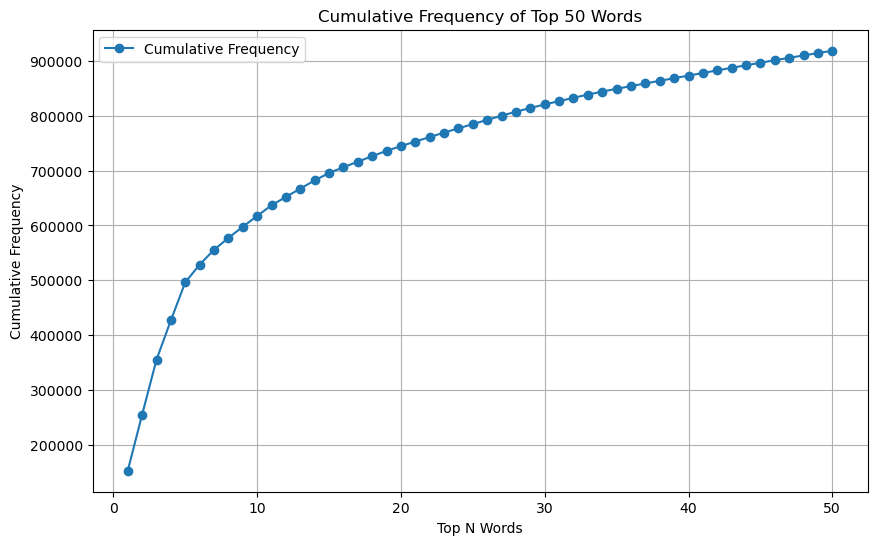

Cumulative Frequency Percentage: 36.75%

Full Corpus Analysis (Without Stop Words):


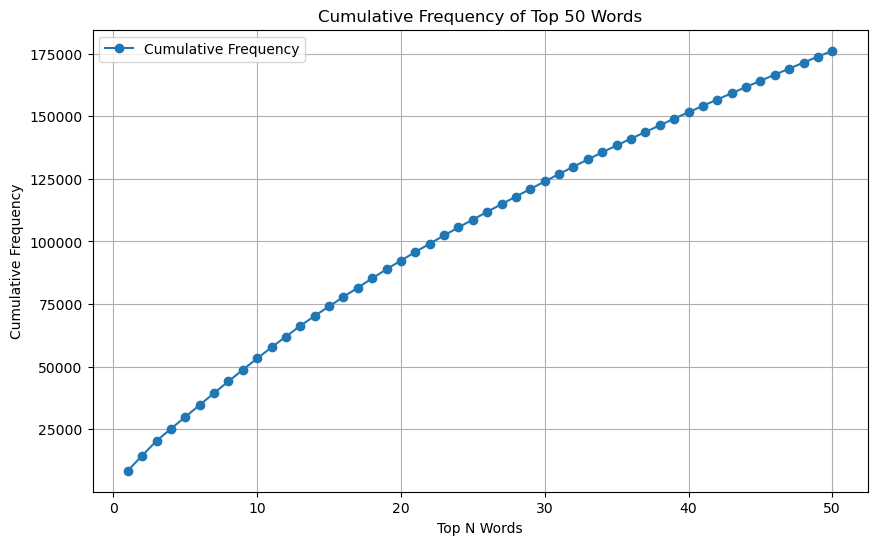

Cumulative Frequency Percentage: 12.18%

SDG 8 Analysis (With Stop Words):


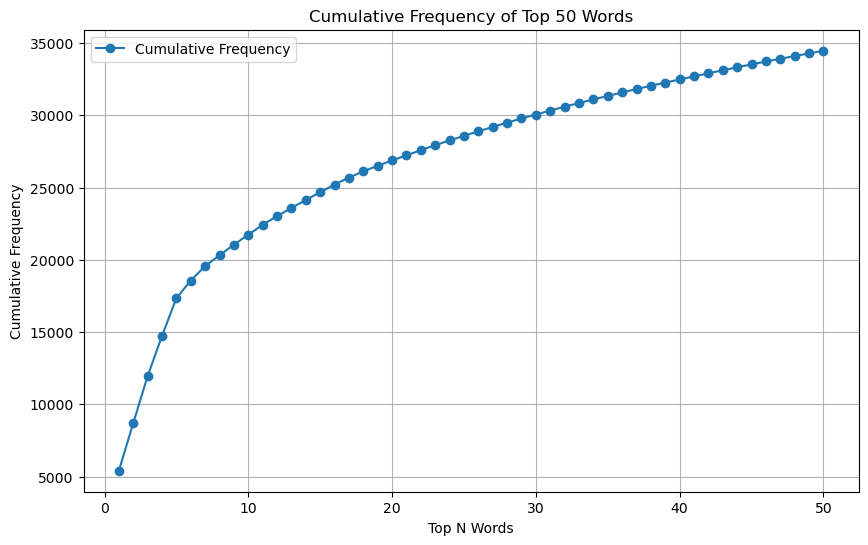

Cumulative Frequency Percentage: 38.58%

SDG 8 Analysis (Without Stop Words):


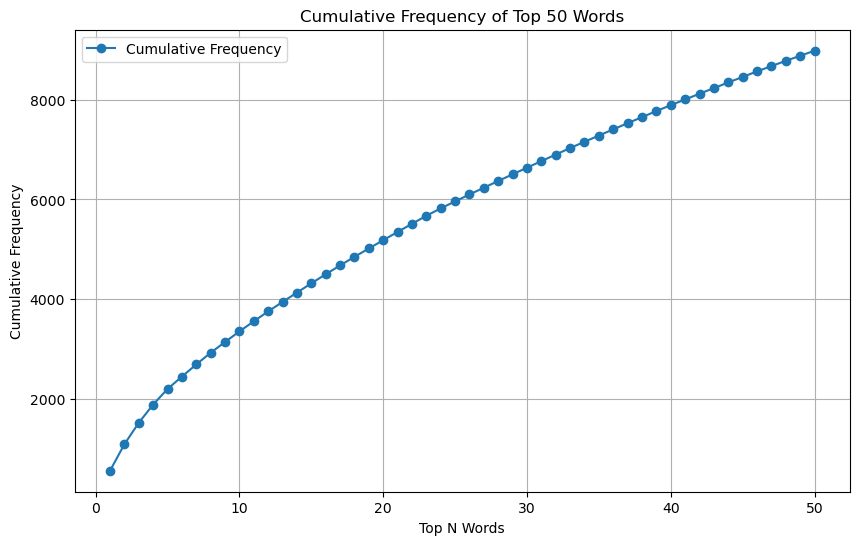

Cumulative Frequency Percentage: 17.51%


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def analyze_top_words(corpus, stop_words=None):
    """
    Analyzes the top 50 most frequent words and their cumulative frequency.
    Args:
        corpus: The text corpus to analyze.
        stop_words : List of stop words to remove, or None to skip removal.

    Returns:
        cumulative_freq_percentage (float): Percentage of cumulative frequency 
                                            of top 50 words compared to total words.
    """
    count_vectorizer = CountVectorizer(stop_words=stop_words)
    
    count_vector = count_vectorizer.fit_transform(corpus)
    
    term_freq = pd.DataFrame({
        "term": count_vectorizer.get_feature_names_out(),
        "freq": count_vector.sum(axis=0).A1
    })
    
    term_freq = term_freq.sort_values(by="freq", ascending=False).reset_index(drop=True)
    
    top_50_terms = term_freq.head(50)
    
    cumulative_freq = top_50_terms["freq"].cumsum()
    total_words = term_freq["freq"].sum()
    cumulative_freq_percentage = cumulative_freq.iloc[-1] / total_words * 100
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 51), cumulative_freq, marker='o', label='Cumulative Frequency')
    plt.title("Cumulative Frequency of Top 50 Words")
    plt.xlabel("Top N Words")
    plt.ylabel("Cumulative Frequency")
    plt.legend()
    plt.grid()
    plt.show()
    
    print(f"Cumulative Frequency Percentage: {cumulative_freq_percentage:.2f}%")
    return cumulative_freq_percentage

text_file_name = "osdg-community-data-v2024-04-01.csv"
text_df = pd.read_csv(data_dir + text_file_name, sep="\t", quotechar='"')
text_df.drop(text_df.columns.values[0], axis=1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2").reset_index(drop=True)

corpus = text_df['text'].astype(str).tolist()

print("Full Corpus Analysis (With Stop Words):")
full_percentage_with_stopwords = analyze_top_words(corpus, stop_words=None)

print("\nFull Corpus Analysis (Without Stop Words):")
full_percentage_without_stopwords = analyze_top_words(corpus, stop_words='english')

sdg_8_corpus = text_df[text_df['sdg'] == 8]['text'].astype(str).tolist()

print("\nSDG 8 Analysis (With Stop Words):")
sdg_8_percentage_with_stopwords = analyze_top_words(sdg_8_corpus, stop_words=None)

print("\nSDG 8 Analysis (Without Stop Words):")
sdg_8_percentage_without_stopwords = analyze_top_words(sdg_8_corpus, stop_words='english')


# Conclusion

## 1. Full Corpus Analysis (With Stop Words)
**Cumulative Frequency Percentage: 36.75%**

- The top 50 most frequent words in the entire corpus, including stop words (e.g., "the," "is," "and"), account for **36.75%** of all word occurrences.
- This high percentage indicates that stop words dominate the corpus, as expected due to their common usage across most texts.

---

## 2. Full Corpus Analysis (Without Stop Words)
**Cumulative Frequency Percentage: 12.18%**

- After removing stop words, the top 50 words contribute only **12.18%** to the total word occurrences.
- This drop highlights the diversity of non-stop words compared tin the corpus.

---

## 3. SDG 8 Analysis (With Stop Words)
**Cumulative Frequency Percentage: 38.58%**

- In documents specificalk and Economic Growth)**, the top 50 words (including stop words) make up **38.58%** of the total word occurrences.
- This slightly higher percentage compared to the full corpus suggests less  and work-related terms.

---

## 4. SDG 8 Analysis (Without Stop Words)
**Cumulative Frequency Percentage: 17.51%**

- After removing stop words, the top 50 words in SDG 8 documents account for **17.51%** of total word occurrences.
- This percentage is higher than the **12.18%** observed for the full corpus, indicating that key terms in SDG 8 documents are more concentrated aroe.g., eey terms or themes relevant to the dataset.

---
